# Head 1st / Head 2nd / Work 1st / Work 2nd

In [1]:
import pyreadstat
import os
import gc
import numpy as np
import copy
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier, plot_importance
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

.sav ===> import pyreadstat, pyreadstat.read_sav(file_path)

.sas7bdat  ====> pandas, pd.read_sas(file_path)

.dta  ===> pd.read_stata(file_path)

In [12]:
def call_df():
    path = 'C:/Users/hml76/Desktop/Jupyter/HRD_With_MJ/HCCPⅡ/'
    file_path = path+'SPSS/HCCPⅡ_2ndWave_Work_3rd.sav'


    dataframe, meta = pyreadstat.read_sav(file_path)
    columns_to_drop0 = ['W22ID2', 'W22ID3']
    dataframe = dataframe.drop(columns=columns_to_drop0)
    
    #y = df[y_name]
    #df.drop(columns=[y_name])
    gc.collect()
    return dataframe

In [13]:
def check_nan(input_dataframe):
    nan_values = input_dataframe.isna()
    nan_count_per_column = nan_values.sum()
    Nan_cols = []
    columns_with_nan = nan_count_per_column[nan_count_per_column > 0]  # Filter columns with NaN values
    print("Columns with NaN values and count of NaN values:")
    for column, count in columns_with_nan.items():
        print(f"Column '{column}' has {count} NaN value(s).")
        Nan_cols.append(column)    
        
    dataframe = input_dataframe.drop(columns=Nan_cols)
    return dataframe


def equal_distirubution_mulit_label(dataframe, y_lst):
    
    balanced_df = pd.DataFrame()  # Initialize an empty DataFrame to store the balanced data
    
    balanced_df = dataframe.sample(frac=1, random_state=42).reset_index(drop=True) # Shuffle the rows 
    #y_balanced = balanced_df[y_lst]
    y_balanced = balanced_df[y_lst].values
    X_balanced = balanced_df.drop(columns=y_lst)
    
    return X_balanced, y_balanced

In [14]:
from sklearn.metrics import classification_report

def XGBoost_multi_label(X_balanced, y_balanced):
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
    
    print(y_train.shape)
    model = XGBClassifier(objective='binary:logistic', num_class=1, subsample=0.8, reg_lambda=0, reg_alpha=0.5, n_estimators=200,
                    min_child_weight=3, max_depth=7, learning_rate=0.1, gamma=0.1,
                    colsample_bytree=0.6)
    
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=False)
    y_pred_proba = model.predict_proba(X_test)
    y_pred = [[1 if prob > 0.5 else 0 for prob in pred] for pred in y_pred_proba]
    
    print("\tAccuracy ========> ", accuracy_score(y_test, y_pred))
    print("classification_report\n", classification_report(y_test, y_pred, digits=4))
    
    #plot_importance(model, max_num_features=10)
    #plt.show()
    
    return model, X_train, X_test, y_test, y_pred

In [15]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def XGBoost_learning_curve(X_balanced, y_balanced, title):
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

    model = XGBClassifier(objective='binary:logistic', num_class=1, subsample=0.8, reg_lambda=0, reg_alpha=0.5, n_estimators=200,
                          min_child_weight=3, max_depth=7, learning_rate=0.1, gamma=0.1,
                          colsample_bytree=0.6)

    eval_set = [(X_train, y_train), (X_test, y_test)]  # Use both training and test sets for evaluation
    eval_metric = ["error", "logloss"]  # Evaluation metrics to be monitored
    model.fit(X_train, y_train, eval_set=eval_set, eval_metric=eval_metric, early_stopping_rounds=100, verbose=False)

    eval_results = model.evals_result()

    num_epochs = len(eval_results['validation_0']['error'])  # Number of epochs
    epochs = range(1, num_epochs + 1)

    plt.figure(figsize=(13, 3.5), dpi=150)
    plt.rcParams['font.family'] = 'Times New Roman'

    plt.subplot(1, 2, 1)
    plt.plot(epochs, eval_results['validation_0']['logloss'], label='Train', marker='o', markersize=3, c='darkblue')
    plt.plot(epochs, eval_results['validation_1']['logloss'], label='Test', marker='o', markersize=3, c='darkred')
    plt.xlabel('Number of Epochs', fontsize=13)
    plt.ylabel('Log Loss', fontsize=13)
    plt.title('{}'.format(title), fontsize=15)
    plt.legend(fontsize=12)
    
    plt.grid(True, linestyle='dotted')
    plt.show()
    
    return model, X_train, X_test, y_test

In [16]:
def feature_imp1(input_model, X_train_, top_k):
    feature_importance = input_model.feature_importances_
    top_indices = np.argsort(feature_importance)[::-1][:top_k]
    top_indices = X.columns[top_indices]
    print(top_indices)

In [17]:
def feature_imp2(input_model, max_num_features):
    plot_importance(input_model, max_num_features)
    plt.show()

In [18]:
def class_one_to_five_TO_one_to_two_multi(dataframe, y_lst):
    for i in range(len(y_lst)):
        print(y_lst[i])
        
        dataframe_1 = dataframe[dataframe[y_lst[i]] != 3]
        dataframe[y_lst[i]] = dataframe_1[y_lst[i]].map({1: 1, 2: 1, 4: 2, 5: 2})
    df_cleaned = dataframe.dropna()

    return df_cleaned

In [19]:
def erase_col_for_importance(dataframe, erase_col_lst):
    dataframe = dataframe.drop(columns=erase_col_lst)
    
    return dataframe

In [20]:
from sklearn.inspection import permutation_importance
def permutational_importance_(model, x_test_, y_test_, Xs):
    result = permutation_importance(model, x_test_, y_test_, n_repeats=10, random_state=42)

    feature_names = Xs.columns

    sorted_idx = result.importances_mean.argsort()

    #plt.figure(figsize=(10, 6))
    #plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
    #plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    #plt.xlabel('Permutation Importance')
    #plt.title('Permutation Importances')
    #plt.show()
    
    print(feature_names[sorted_idx][-10:])
    
    return feature_names[sorted_idx][-10:]

In [38]:
scaler = MinMaxScaler()
df = call_df()
df = check_nan(df)
DF = copy.deepcopy(df)

Columns with NaN values and count of NaN values:


# 5. 조직신뢰 

(1)직원들에게 회사 사정을 소상하게 알려준다

(2)상급자에게 의견을 자유롭게 낼 수 있다

(3)부서간의 커뮤니케이션이 잘 되는 편이다

(4)동료들 간에 서로 신뢰한다

(5)평가 및 보상이 공정하게 이루어진다

(6)경영진은 모든 면에서 믿고 따라갈 만하다

2개로 줄임: Class (1, 2) ====> 1 & (4, 5) ====> 2 & (3) ====> 삭제 

In [39]:
Y = ['W22Q24A', 'W22Q24B', 'W22Q24C', 'W22Q24D', 'W22Q24E', 'W22Q24F']
X = class_one_to_five_TO_one_to_two_multi(df, Y)

X, y = equal_distirubution_mulit_label(X, Y)
y=y-1

model, x_tr, x_tst, y_tst, y_prd = XGBoost_multi_label(X, y)
PI = permutational_importance_(model, x_tst, y_tst, X)

W22Q24A
W22Q24B
W22Q24C
W22Q24D
W22Q24E
W22Q24F
(1976, 6)
	Accuracy ========>  0.819838056680162
classification_report
               precision    recall  f1-score   support

           0     0.9496    0.9547    0.9521       375
           1     0.9453    0.9503    0.9478       382
           2     0.9581    0.9337    0.9457       392
           3     0.9508    0.9459    0.9483       388
           4     0.9499    0.9549    0.9524       377
           5     0.9526    0.9628    0.9577       376

   micro avg     0.9510    0.9502    0.9506      2290
   macro avg     0.9511    0.9504    0.9507      2290
weighted avg     0.9511    0.9502    0.9506      2290
 samples avg     0.7703    0.7761    0.7656      2290

Index(['W22Q15C2', 'W22Q25A', 'W22Q23B', 'W22Q27C', 'W22DQ041', 'W22Q25C',
       'W22Q22D', 'W22Q27D', 'W22Q23D', 'W22Q25D'],
      dtype='object')


In [40]:
for j in range(6):
    cnt, cnt2 = 0, 0
    for i in range(len(y_prd)):
        if y_prd[i][j] == y_tst[i][j]:
            cnt = cnt+1
        else:
            cnt2 = cnt2+1
            
    print(f'{cnt/(cnt+cnt2)}')

0.9271255060728745
0.9190283400809717
0.9149797570850202
0.9190283400809717
0.9271255060728745
0.9352226720647774


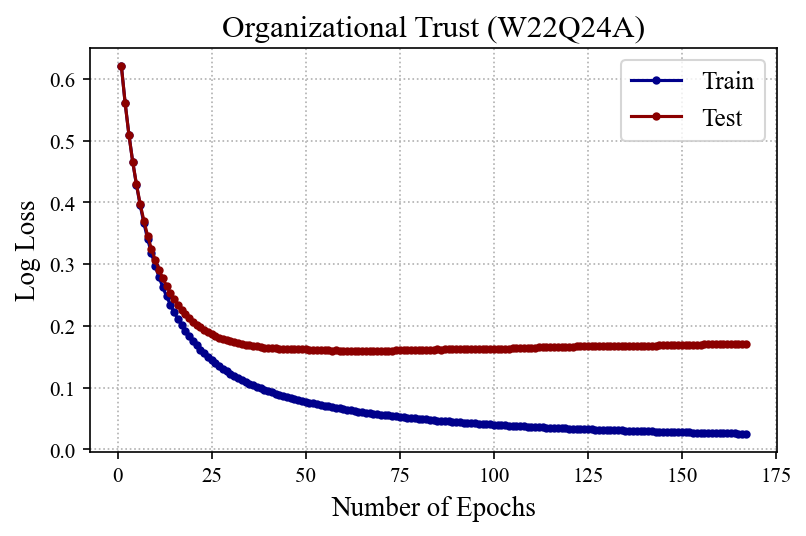

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.6, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=7, max_leaves=None,
               min_child_weight=3, missing=nan, monotone_constraints=None,
               n_estimators=200, n_jobs=None, num_class=1,
               num_parallel_tree=None, predictor=None, ...),
       W22ID1  W22IND1  W22SCALE  W22SCALE2  W22Q01A  W22Q01B  W22Q02A  \
 961    904.0      1.0       1.0        1.0   2012.0      2.0   2018.0   
 1610  3393.0      1.0       1.0        1.0   2018.0      4.0   2020.0   
 1525  2037.0      3.0       

In [41]:
XGBoost_learning_curve(X, y, 'Organizational Trust (W22Q24A)')

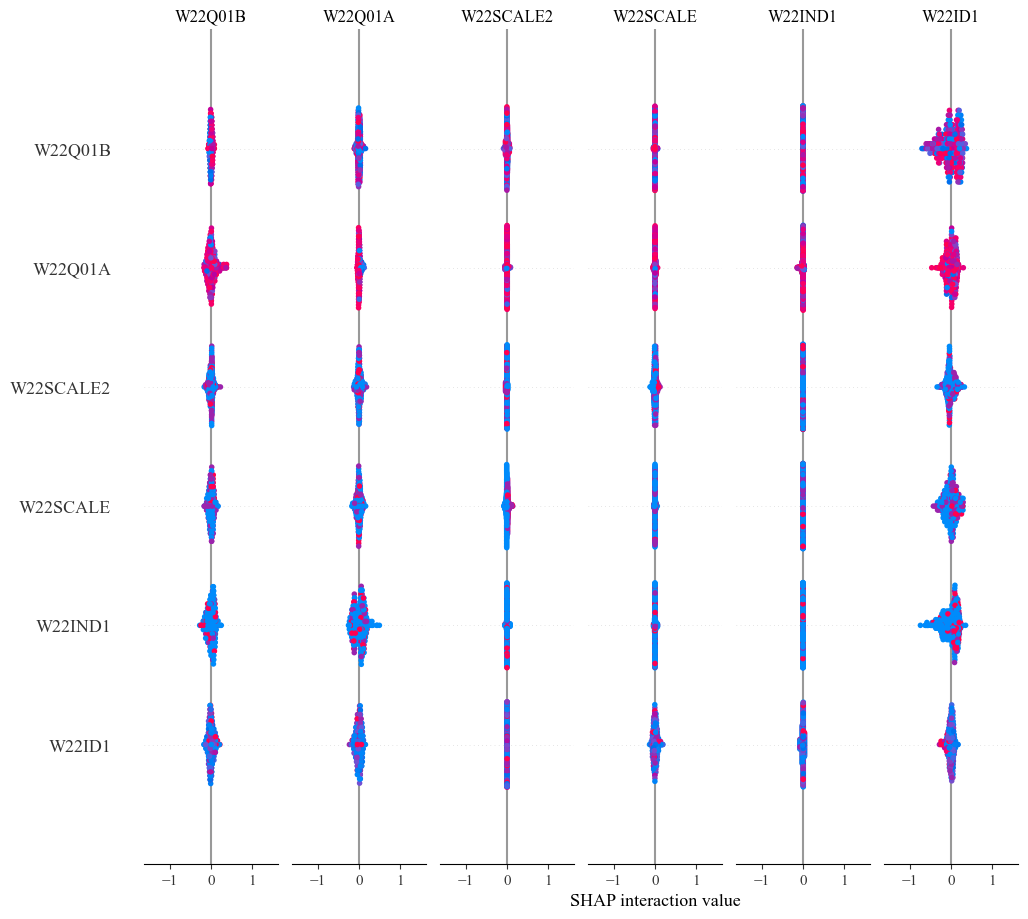

In [42]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_tst)

shap.summary_plot(shap_values, x_tst, max_display=10)

#shap_figure = shap.dependence_plot(i, shap_values, X.values, feature_names=X.columns, dot_size=10, interaction_index=None, x_jitter=-0.5)

#ax_list = shap_figure .axes # see https://stackoverflow.com/a/24107230/11148296
#ax = ax_list[0]
#ax.set_xlabel('Time', fontsize=14)
#ax.set_ylabel('Values', fontsize=14)

In [ ]:
#shap.plots.scatter(shap_values[:,"W21Q25B"])  

In [43]:
PI = list(PI)
FI = ['W22Q25B', 'W22Q25D', 'W22Q23B', 'W22Q23D', 'W22Q25A', 'W22Q23C', 'W22Q26C', 'W22Q25L', 'W22Q26I', 'W22Q27D']

In [44]:
from collections import Counter

arr_1d = np.array(np.array(FI+PI)).flatten()

element_counts = Counter(arr_1d)

top_5_elements = element_counts.most_common(5)

print("Top 5 elements with highest frequency:")
for element, frequency in top_5_elements:
    print("Element:", element, "Frequency:", frequency)

Top 5 elements with highest frequency:
Element: W22Q25D Frequency: 2
Element: W22Q23B Frequency: 2
Element: W22Q23D Frequency: 2
Element: W22Q25A Frequency: 2
Element: W22Q27D Frequency: 2


In [45]:
np.array(PI+FI)

array(['W22Q15C2', 'W22Q25A', 'W22Q23B', 'W22Q27C', 'W22DQ041', 'W22Q25C',
       'W22Q22D', 'W22Q27D', 'W22Q23D', 'W22Q25D', 'W22Q25B', 'W22Q25D',
       'W22Q23B', 'W22Q23D', 'W22Q25A', 'W22Q23C', 'W22Q26C', 'W22Q25L',
       'W22Q26I', 'W22Q27D'], dtype='<U8')

# 6. 직무만족 

(1)현재 하고 있는 일의 내용에 만족한다

(2)현재 받고 있는 임금에 만족한다

(3)현재 직장의 인간관계에 만족한다

하고 있는 일에 대한 전반적 만족도

In [46]:
scaler = MinMaxScaler()
df = call_df()
df = check_nan(df)
DF = copy.deepcopy(df)

Columns with NaN values and count of NaN values:


W22Q26A
W22Q26B
W22Q26C
W22Q261
(2575, 4)
	Accuracy ========>  0.7639751552795031
classification_report
               precision    recall  f1-score   support

           0     0.9454    0.9555    0.9504       562
           1     0.8652    0.9387    0.9005       506
           2     0.9292    0.9701    0.9492       568
           3     0.9353    0.9605    0.9477       557

   micro avg     0.9194    0.9567    0.9377      2193
   macro avg     0.9188    0.9562    0.9370      2193
weighted avg     0.9201    0.9567    0.9379      2193
 samples avg     0.8534    0.8697    0.8501      2193

Index(['W22Q09F', 'W22Q05A', 'W22Q061D', 'W22Q082B', 'W22Q31A', 'W22Q23A',
       'W22Q27E', 'W22Q04', 'W22Q27D', 'W22Q27A'],
      dtype='object')


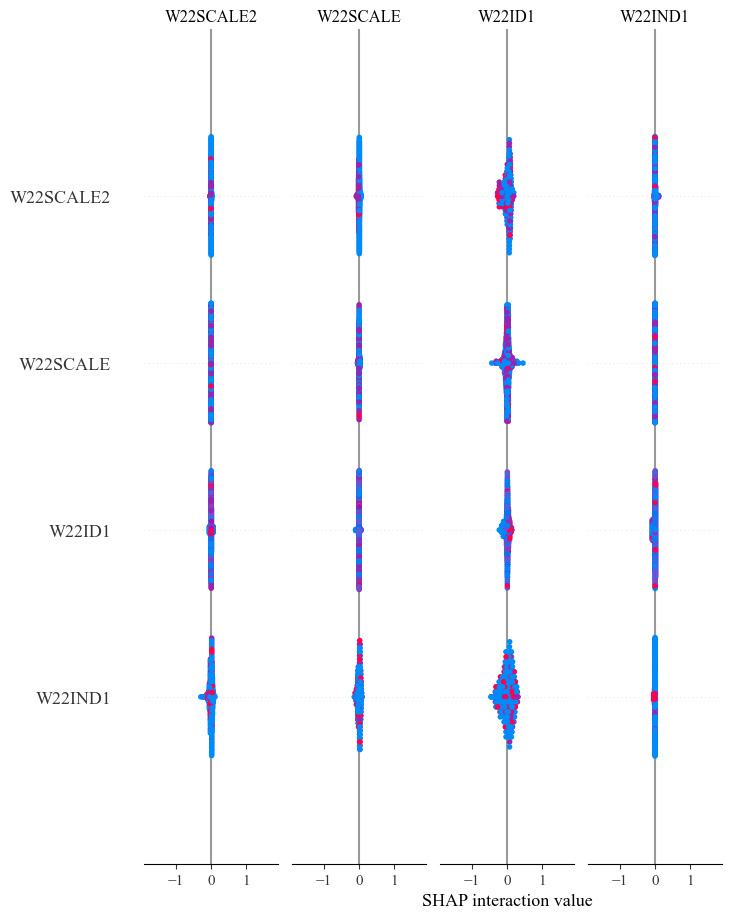

In [47]:
import shap
Y = ['W22Q26A', 'W22Q26B', 'W22Q26C', 'W22Q261']
X = class_one_to_five_TO_one_to_two_multi(df, Y)
X, y = equal_distirubution_mulit_label(X, Y)
y=y-1

model, x_tr, x_tst, y_tst, y_prd = XGBoost_multi_label(X, y)
PI = permutational_importance_(model, x_tst, y_tst, X)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_tst)
shap.summary_plot(shap_values, x_tst, max_display=10)

In [48]:
for j in range(4):
    cnt, cnt2 = 0, 0
    for i in range(len(y_prd)):
        if y_prd[i][j] == y_tst[i][j]:
            cnt = cnt+1
        else:
            cnt2 = cnt2+1
            
    print(f'{cnt/(cnt+cnt2)}')

0.9130434782608695
0.8369565217391305
0.9083850931677019
0.9083850931677019


In [49]:
FI = ['W22Q27D', 'W22Q24F', 'W22Q24D', 'W22Q25D', 'W22Q27F', 'W22Q24E', 'W22Q27A', 'W22Q23A', 'W22Q22D', 'W22Q25B']
np.array(PI.tolist()+FI)

array(['W22Q09F', 'W22Q05A', 'W22Q061D', 'W22Q082B', 'W22Q31A', 'W22Q23A',
       'W22Q27E', 'W22Q04', 'W22Q27D', 'W22Q27A', 'W22Q27D', 'W22Q24F',
       'W22Q24D', 'W22Q25D', 'W22Q27F', 'W22Q24E', 'W22Q27A', 'W22Q23A',
       'W22Q22D', 'W22Q25B'], dtype='<U8')

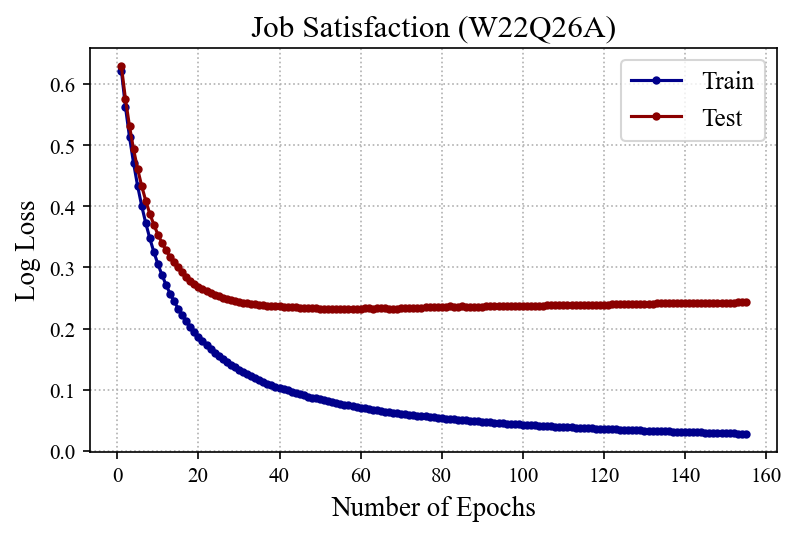

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.6, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=7, max_leaves=None,
               min_child_weight=3, missing=nan, monotone_constraints=None,
               n_estimators=200, n_jobs=None, num_class=1,
               num_parallel_tree=None, predictor=None, ...),
       W22ID1  W22IND1  W22SCALE  W22SCALE2  W22Q01A  W22Q01B  W22Q02A  \
 2430   150.0      3.0       2.0        2.0   1998.0     12.0   2006.0   
 366   3946.0      1.0       1.0        1.0   1997.0      1.0   2021.0   
 1960    39.0      1.0       

In [50]:
XGBoost_learning_curve(X, y, 'Job Satisfaction (W22Q26A)')

# 7. 조직몰입 

(1) 나는 조금이라도 좋은 조건을 제시하는 회사가 있으면 옮길 것을 고려해 보고 있다

(2) 나는 이 회사의 문제를 내 문제처럼 느낀다

(3) 만약 내가 이 회사를 떠나기로 결정한다면 내 인생의 너무 많은 것을 잃게 될 것이다

(4) 이 회사는 내가 충성할 만한 가치가 있다

In [51]:
scaler = MinMaxScaler()
df = call_df()
df = check_nan(df)
DF = copy.deepcopy(df)

Columns with NaN values and count of NaN values:


W22Q27A
W22Q27B
W22Q27C
W22Q27D
(2061, 4)
	Accuracy ========>  0.5
classification_report
               precision    recall  f1-score   support

           0     0.7621    0.7795    0.7707       263
           1     0.8311    0.8587    0.8447       361
           2     0.8058    0.8676    0.8356       287
           3     0.8522    0.8442    0.8482       321

   micro avg     0.8156    0.8401    0.8277      1232
   macro avg     0.8128    0.8375    0.8248      1232
weighted avg     0.8160    0.8401    0.8277      1232
 samples avg     0.7967    0.7964    0.7737      1232

Index(['W22Q14A', 'W22Q192', 'W22Q24D', 'W22Q261', 'W22Q27G', 'W22Q26B',
       'W22DQ02A', 'W22Q24F', 'W22Q27F', 'W22Q27E'],
      dtype='object')


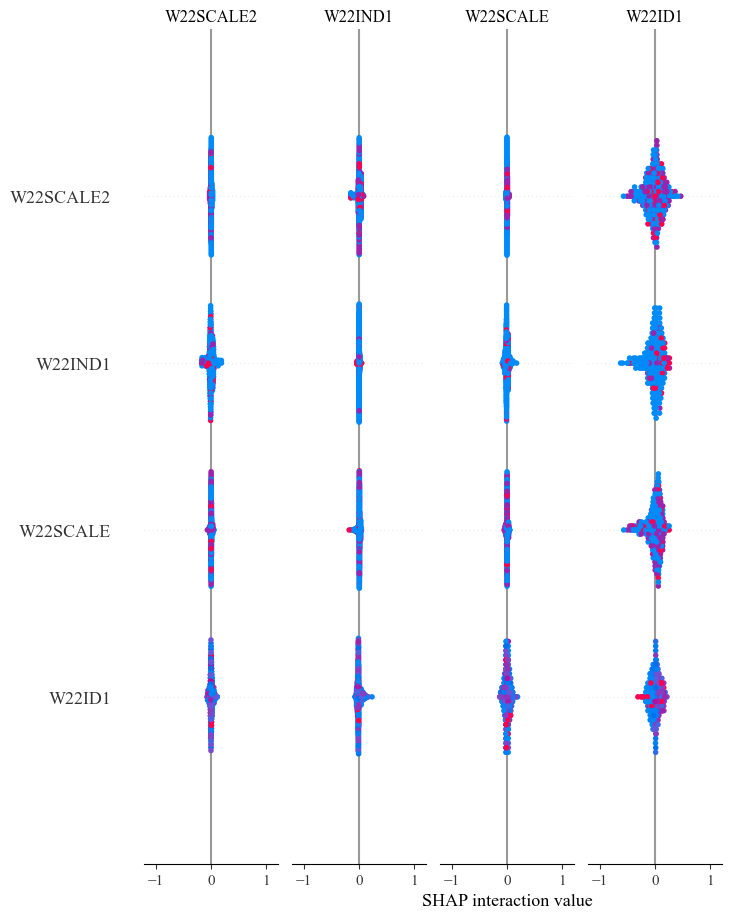

In [52]:
import shap
Y = ['W22Q27A', 'W22Q27B', 'W22Q27C', 'W22Q27D']
X = class_one_to_five_TO_one_to_two_multi(df, Y)
X, y = equal_distirubution_mulit_label(X, Y)
y=y-1

model, x_tr, x_tst, y_tst, y_prd = XGBoost_multi_label(X, y)
PI = permutational_importance_(model, x_tst, y_tst, X)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_tst)
shap.summary_plot(shap_values, x_tst, max_display=10)

In [55]:
for j in range(4):
    cnt, cnt2 = 0, 0
    for i in range(len(y_prd)):
        if y_prd[i][j] == y_tst[i][j]:
            cnt = cnt+1
        else:
            cnt2 = cnt2+1
            
    print(f'{cnt/(cnt+cnt2)}')

0.7635658914728682
0.7790697674418605
0.810077519379845
0.812015503875969


In [56]:
FI = ['W22Q261', 'W22Q24F', 'W22Q26A', 'W22Q27E', 'W22DQ02A', 'W22Q26B', 'W22Q27G', 'W22Q01A', 'W22Q27F', 'W22Q24A']
np.array(PI.tolist()+FI)

array(['W22Q14A', 'W22Q192', 'W22Q24D', 'W22Q261', 'W22Q27G', 'W22Q26B',
       'W22DQ02A', 'W22Q24F', 'W22Q27F', 'W22Q27E', 'W22Q261', 'W22Q24F',
       'W22Q26A', 'W22Q27E', 'W22DQ02A', 'W22Q26B', 'W22Q27G', 'W22Q01A',
       'W22Q27F', 'W22Q24A'], dtype='<U8')

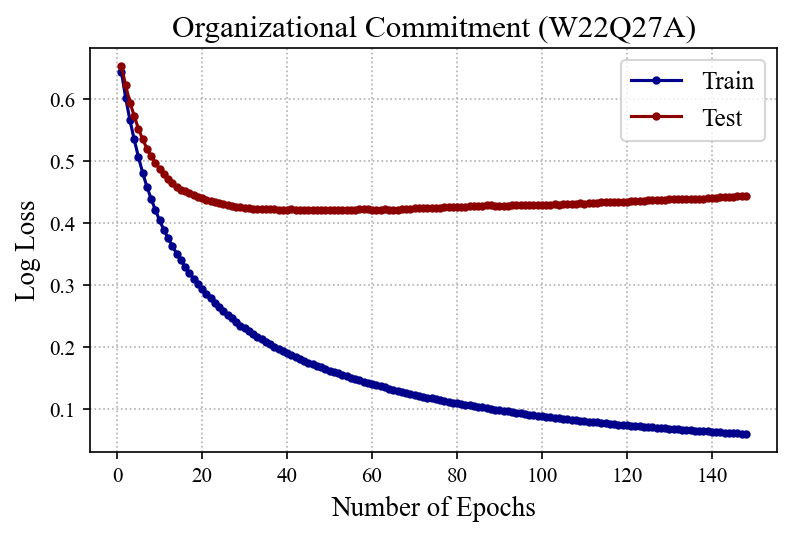

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.6, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=7, max_leaves=None,
               min_child_weight=3, missing=nan, monotone_constraints=None,
               n_estimators=200, n_jobs=None, num_class=1,
               num_parallel_tree=None, predictor=None, ...),
       W22ID1  W22IND1  W22SCALE  W22SCALE2  W22Q01A  W22Q01B  W22Q02A  \
 2266  2690.0      1.0       1.0        1.0   2017.0      6.0   2017.0   
 1677  3037.0      1.0       1.0        1.0   2011.0      7.0   2019.0   
 2188   405.0      2.0       

In [54]:
XGBoost_learning_curve(X, y, 'Organizational Commitment (W22Q27A)')

# 8. 번아웃 

(6) 나는 현재 업무로 인해 무력감이나 피곤함을 느낄 때가 많아졌다

In [59]:
arr = [[94.14, 92.71, 95.69, 94.96, 96.73, 95.47, 96.21, 95.21],
[94.98, 91.90, 96.58, 94.53, 97.09, 94.78, 96.83, 94.78],
[94.98, 91.49, 96.57, 95.81, 97.08, 94.57, 96.83, 94.57],
[95.61, 91.90, 96.65, 95.08, 96.89, 94.59, 97.27, 94.83 ],
[94.98, 92.71, 95.98, 94.99, 97.55, 95.49, 96.76, 95.24 ],
[95.61, 93.52, 97.56, 95.26, 96.77, 96.28, 97.17, 95.77 ],
[96.21, 91.30, 97.68, 94.54, 98.17, 95.55, 97.93, 95.04 ],
[93.02, 83.69, 94.79, 86.52, 97.41, 93.87, 96.08, 90.05 ],
[96.36, 90.84, 97.41, 92.92, 98.69, 97.01, 98.04, 94.92 ],
[95.75, 90.84, 97.18, 93.53, 98.16, 96.05, 97.67, 94.77 ],
[81.74, 76.35, 82.97, 76.21, 84.19, 77.95, 83.58, 77.07 ],
[83.57, 77.91, 85.93, 83.11, 89.56, 85.87, 88.95, 84.47],
[82.56, 81.01, 81.49, 80.58, 87.07, 86.76, 84.19, 83.56 ],
[90.67, 81.21, 90.91, 85.22, 94.46, 84.42, 92.65, 84.82 ]]
np.mean(np.array(arr).T, axis=1)

array([92.15571429, 87.67      , 93.385     , 90.23285714, 94.98714286,
       92.04714286, 94.29714286, 91.07857143])

In [60]:
np.std(np.array(arr).T, axis=1)

array([5.18236807, 5.94021524, 5.49792006, 6.32130121, 4.42377897,
       5.61277297, 4.85301442, 5.83771954])

In [63]:
pd.DataFrame(arr).to_csv('./multi_label_classificaation_result.csv', index=False)

In [ ]:

94.98 & 91.90 & 96.58 & 94.53 & 97.09 & 94.78 & 96.83 & 94.78\\
94.98 & 91.49 & 96.57 & 95.81 & 97.08 & 94.57 & 96.83 & 94.57\\
95.61 & 91.90 & 96.65 & 95.08 & 96.89 & 94.59 & 97.27 & 94.83 \\
94.98 & 92.71 & 95.98 & 94.99 & 97.55 & 95.49 & 96.76 & 95.24 \\
95.61 & 93.52 & 97.56 & 95.26 & 96.77 & 96.28 & 97.17 & 95.77 \\
96.21 & 91.30 & 97.68 & 94.54 & 98.17 & 95.55 & 97.93 & 95.04 \\
93.02 & 83.69 & 94.79 & 86.52 & 97.41 & 93.87 & 96.08 & 90.05 \\
96.36 & 90.84 & 97.41 & 92.92 & 98.69 & 97.01 & 98.04 & 94.92 \\
95.75 & 90.84 & 97.18 & 93.53 & 98.16 & 96.05 & 97.67 & 94.77 \\
81.74 & 76.35 & 82.97 & 76.21 & 84.19 & 77.95 & 83.58 & 77.07 \\
83.57 & 77.91 & 85.93 & 83.11 & 89.56 & 85.87 & 88.95 & 84.47\\
82.56 & 81.01 & 81.49 & 80.58 & 87.07 & 86.76 & 84.19 & 83.56 \\
90.67 & 81.21 & 90.91 & 85.22 & 94.46 & 84.42 & 92.65 & 84.82 \\

In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_tst)

# Visualize SHAP values
shap.summary_plot(shap_values, x_tst)

In [ ]:
sv = explainer(X)
shap.plots.waterfall(sv[0])

In [ ]:
import shap

shap.initjs()
sv = explainer(X)
shap.plots.force(sv[0])

In [ ]:
shap.plots.scatter(sv[:,"W21ID1"], color=sv)

In [ ]:
imp_lst1 = ['W21Q27E', 'W21Q27G', 'W21Q261', 'W21Q26A', 'W21Q27A']
imp_lst2 = ['W21ID1', 'W21Q04', 'W21Q27G', 'W21DQ02A', 'W21Q27E']

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, x_tst, y_tst, n_repeats=10, random_state=42)

feature_names = X.columns

sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importances')
plt.show()

In [ ]:
feature_names[sorted_idx][-10:]

# Feature importance랑 Permutation importance는 유사함 (sorting)

In [1]:
from collections import Counter

# List of all the new elements
new_elements_2 = [
    'W22Q15E2', 'W22Q26B', 'W22Q05A', 'W22Q09E', 'W22Q25J', 'W22ID1', 'W22Q27F', 'W22Q261', 'W22DQ02A', 'W22Q27E',
    'W22Q24B', 'W22Q15A2', 'W22Q061D', 'W22Q22B', 'W22DQ02A', 'W22DQ03', 'W22Q24C', 'W22Q261', 'W22Q26C', 'W22Q27G',
    'W22Q12B', 'W22DQ01', 'W22Q01A', 'W22Q25B', 'W22Q22A', 'W22Q18B', 'W22ID1', 'W22Q26A', 'W22Q27G', 'W22Q27E',
    'W22Q24A', 'W22Q26A', 'W22Q083A', 'W22Q15A1', 'W22Q25B', 'W22Q25F', 'W22Q261', 'W22Q26C', 'W22Q25D', 'W22Q24F'
]

# Count the frequency of each new element
new_frequency_count_2 = Counter(new_elements_2)

# Find the top 10 elements with the highest frequency in the new list
new_top_10_frequencies_2 = new_frequency_count_2.most_common(10)

# Print the results
for element, frequency in new_top_10_frequencies_2:
    print(f'{element}: {frequency}')

W22Q261: 3
W22ID1: 2
W22DQ02A: 2
W22Q27E: 2
W22Q26C: 2
W22Q27G: 2
W22Q25B: 2
W22Q26A: 2
W22Q15E2: 1
W22Q26B: 1


# SMOTE -> data augmentation based on synthetic dataset

justification: 심하게 skewed 된 학습데이터만 증강 기법을 써서 올림 => test 데이터 자체는 그대로 유지

Overfitting 이 보이는 시점이 있음 => 실제로 어느정도는 도움이 된다는 뜻

In [ ]:
from xgboost import XGBClassifier, plot_importance
scaler = MinMaxScaler()
from imblearn.over_sampling import SMOTE

X = df_no_nan.drop(columns=[Y[target_idx]])
y = df_no_nan[Y[target_idx]] 
X_normalized = scaler.fit_transform(X)
df = pd.DataFrame(X_normalized, columns=X.columns)

print(y.value_counts())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)

print(y_resampled.value_counts())

In [ ]:
y_resampled = y_resampled - 1

X_train, X_test, y_train, y_test = train_test_split(balanced_df, y_resampled, test_size=0.2, random_state=42)

num_boost_round = 300  
model = XGBClassifier(n_estimators=num_boost_round)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=True)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)